In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

##### 과제 1
Start column의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요

In [2]:
df = pd.read_csv('../Data/주가데이터.csv')
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

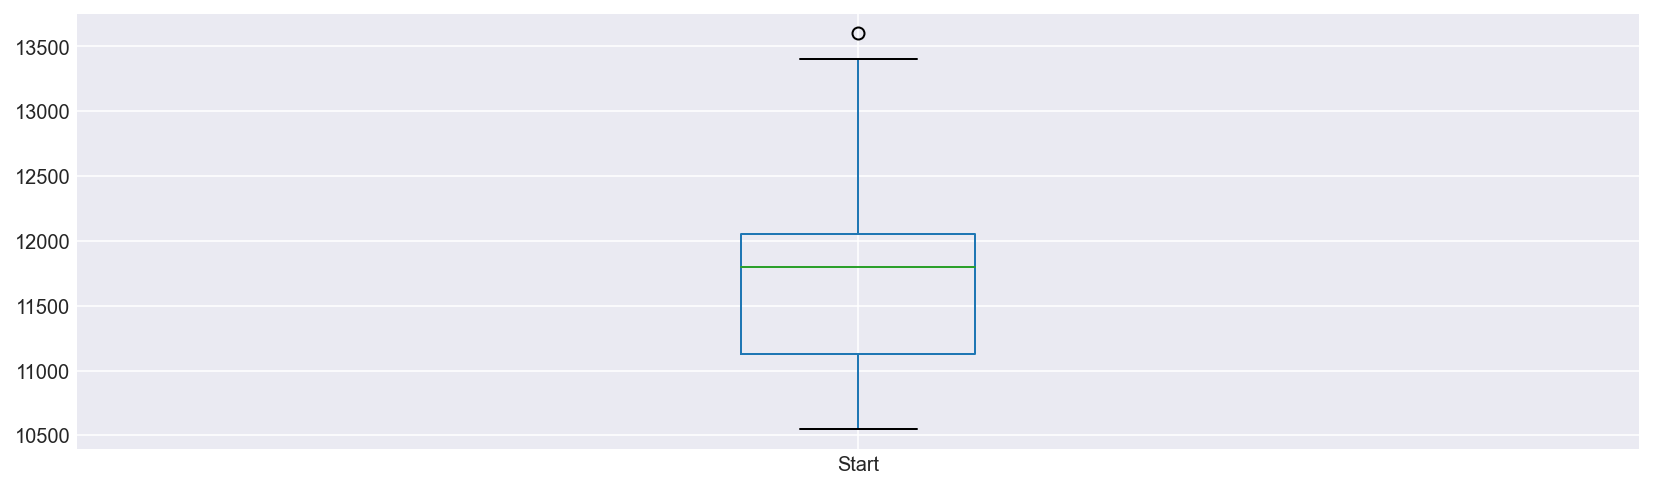

In [3]:
df1['Start'].plot(kind='box')
df1['Start'].describe()

In [4]:
Q1 = df1['Start'].describe()['25%']
Q3 = df1['Start'].describe()['75%']
IQR = Q3 - Q1 
outlier = df[(df['Start'] <= (Q1-IQR*1.5)) | ((df['Start'] >= (Q3+IQR*1.5)))]

outlier_2 = []
for i in df['Start']:
    if not Q1 - IQR * 1.5 < i < Q3 + IQR * 1.5:
        outlier_2.append(i)
display(outlier)
print(outlier_2)

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


[13600]


##### 과제2
남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.

<AxesSubplot:xlabel='year'>

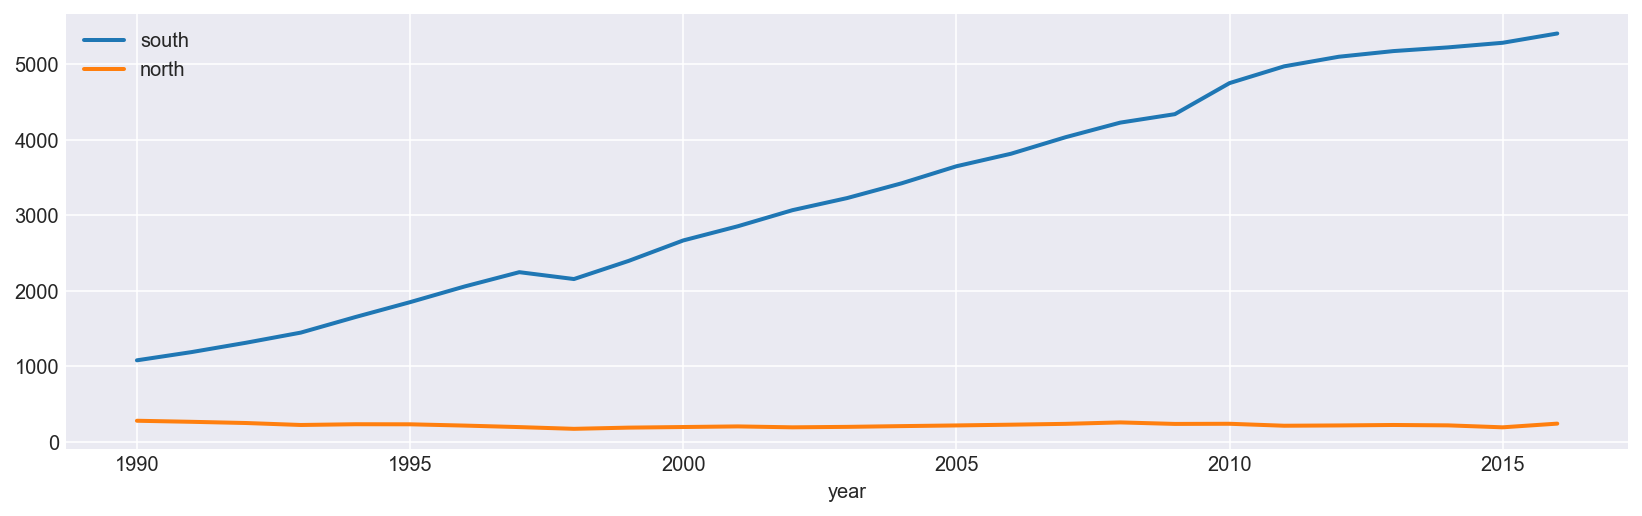

In [5]:
df_ep = pd.read_excel('../Data/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
df_ep.plot()

<AxesSubplot:xlabel='year'>

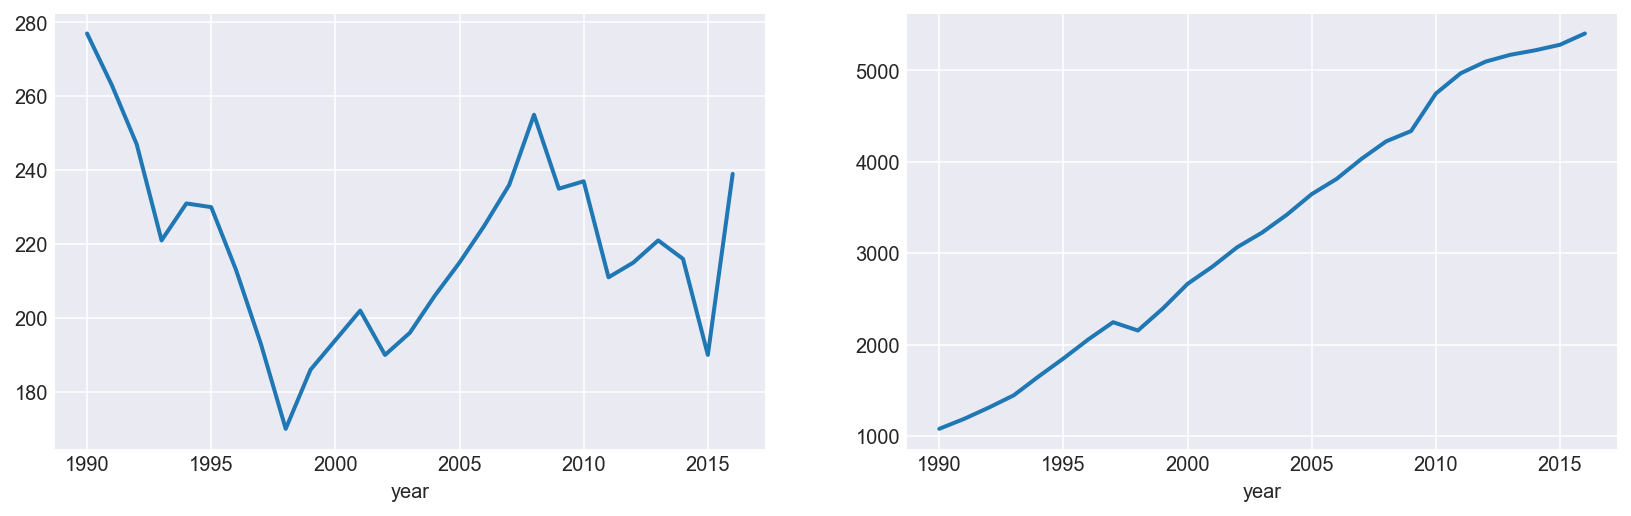

In [6]:
plt.subplot(1,2,1)
df_ep['north'].plot()
plt.subplot(1,2,2)
df_ep['south'].plot()

In [7]:
df_ep.describe()

,south,north
count,27.000000,27.000000
mean,3278.629630,219.037037
std,1435.906927,25.236545
min,1077.000000,170.000000
25%,2104.000000,199.000000
50%,3225.000000,216.000000
75%,4541.500000,235.500000
max,5404.000000,277.000000


##### 과제
df_auto의 각 컬럼을 시각화해서 탐색한 후 인사이트를 기술하세요

In [8]:
import pandas as pd
df_auto = pd.read_excel('../Data/auto-mpg.xlsx')
df_auto.head()
df_auto.sort_values('acceleration',ascending=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
116,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
...,...,...,...,...,...,...,...,...,...
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


In [9]:
df_auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

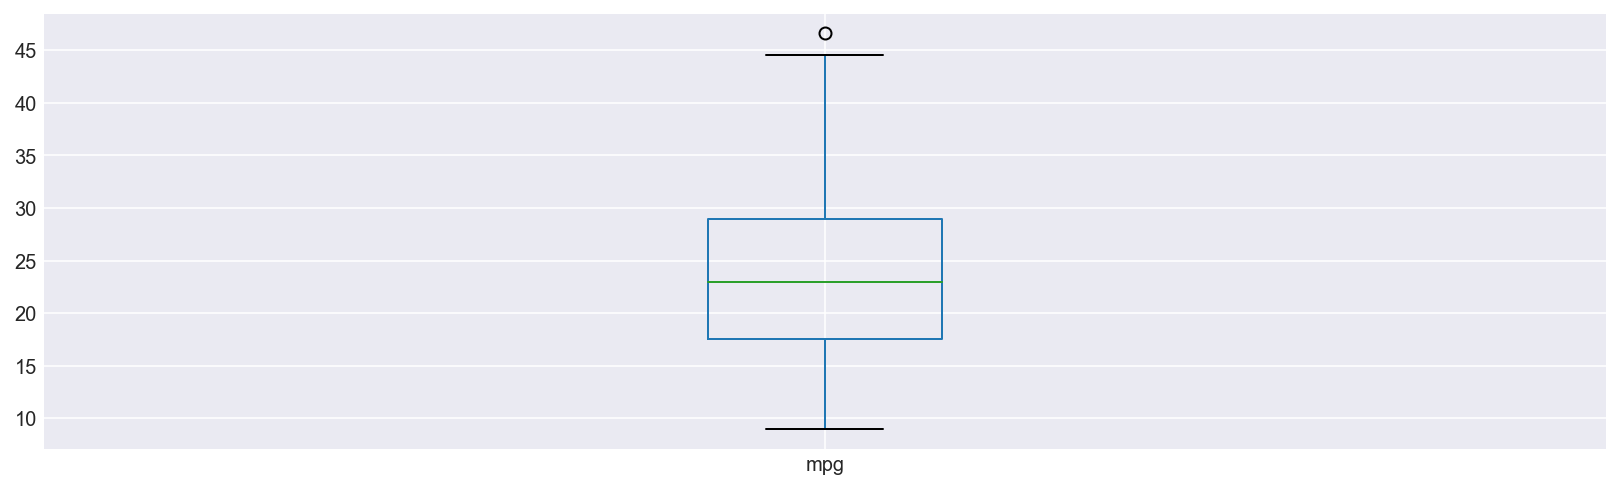

In [10]:
df_auto['mpg'].plot(kind='box') #이상치 하나 존재. -이상치 파악
df_auto['mpg'].describe()

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

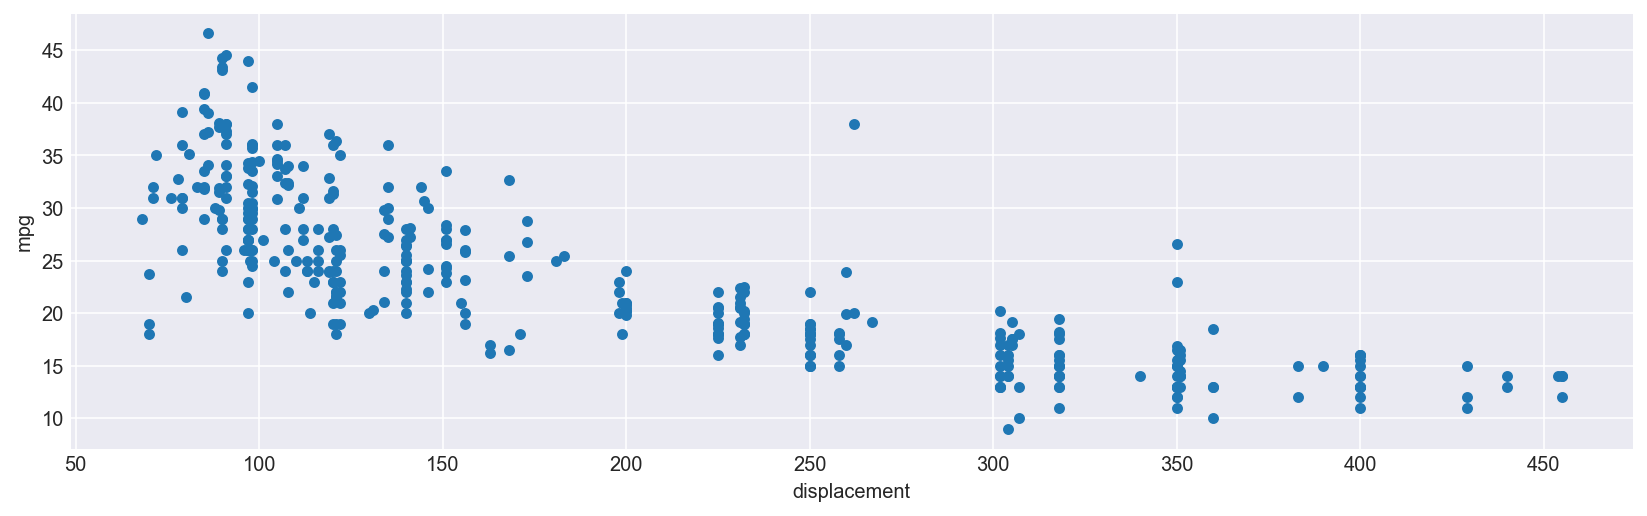

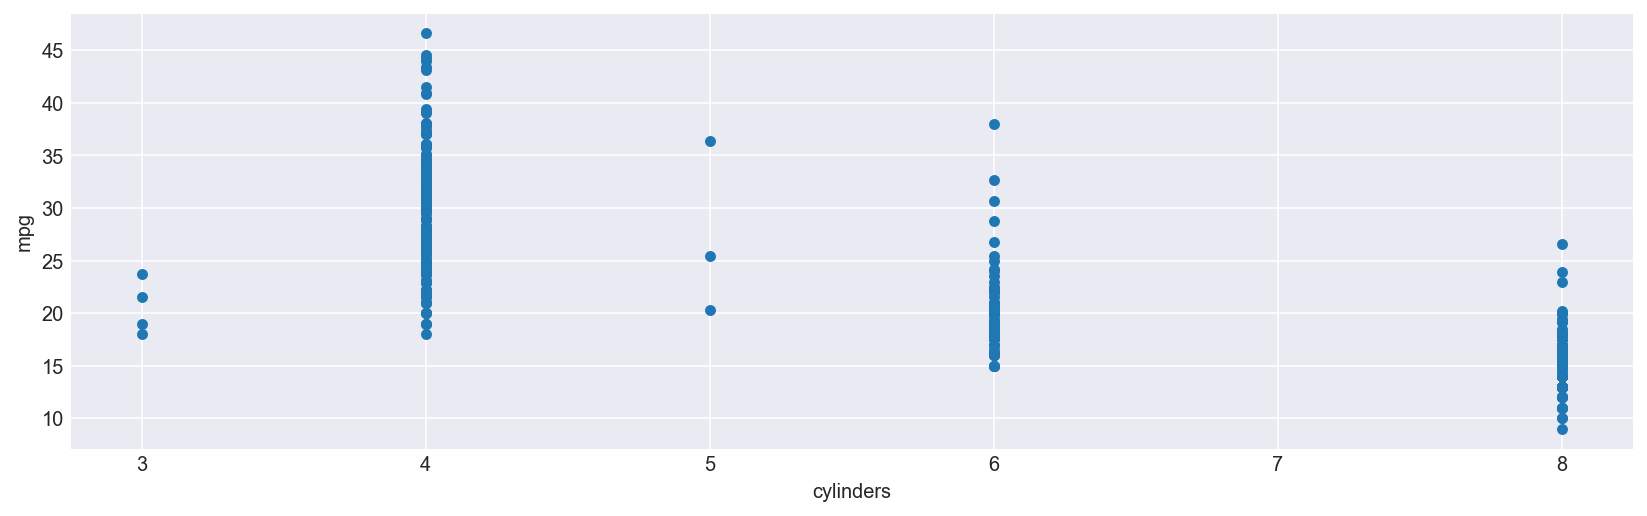

In [11]:
df_auto.plot(x='displacement',y='mpg',kind='scatter')
df_auto.plot(x='cylinders',y='mpg',kind='scatter')

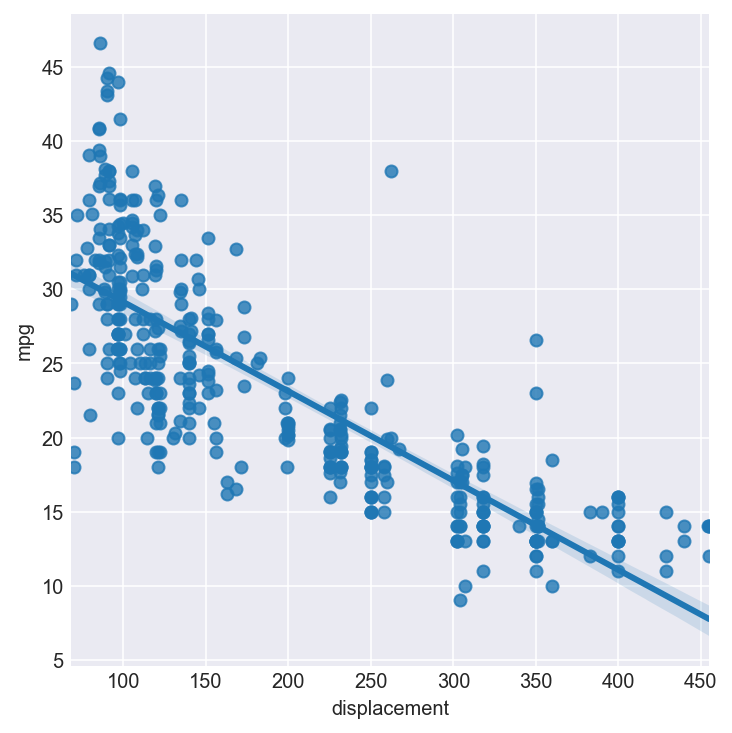

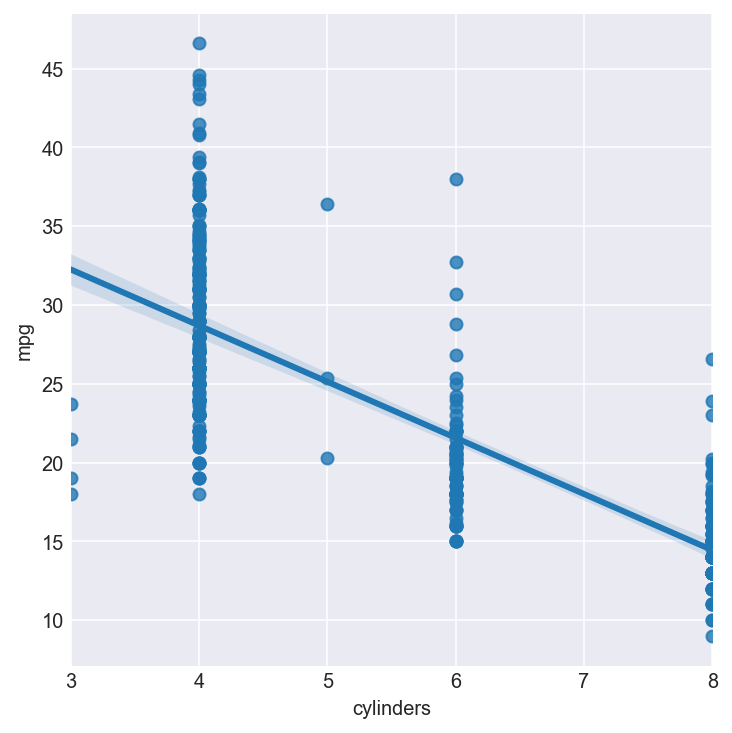

In [12]:
sns.lmplot(data=df_auto,x='displacement',y='mpg')
# displacement(배기량)이 높을수록 mpg는 감소함.
sns.lmplot(data=df_auto,x='cylinders',y='mpg')
#displacement(배기량)과 마찬가지로 cylinders(기통수)가 높을수록 연비는 감소함.

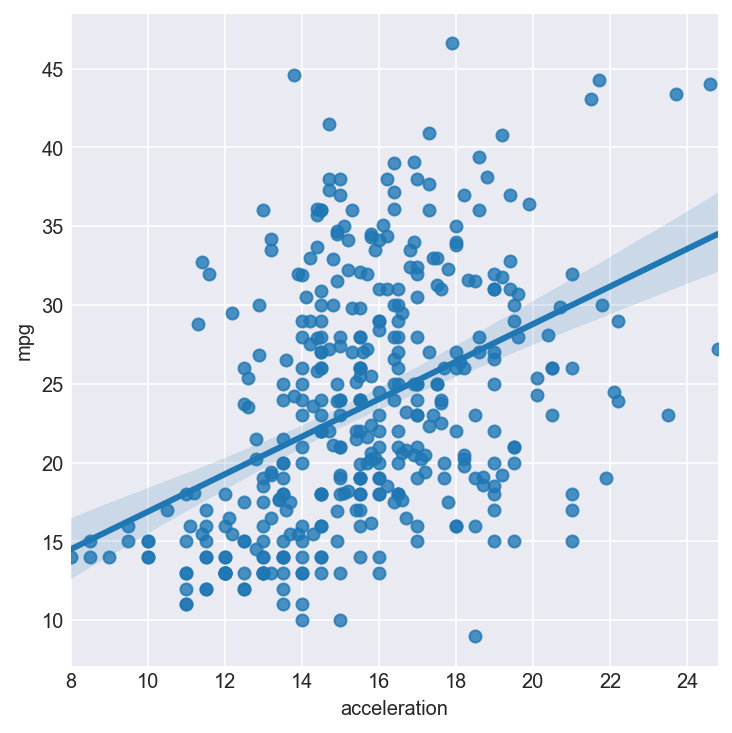

In [13]:
sns.lmplot(data=df_auto,x='acceleration',y='mpg')
#연비와 제로백의 시간은 정비례관계를 보인다.

<AxesSubplot:xlabel='horsepower', ylabel='displacement'>

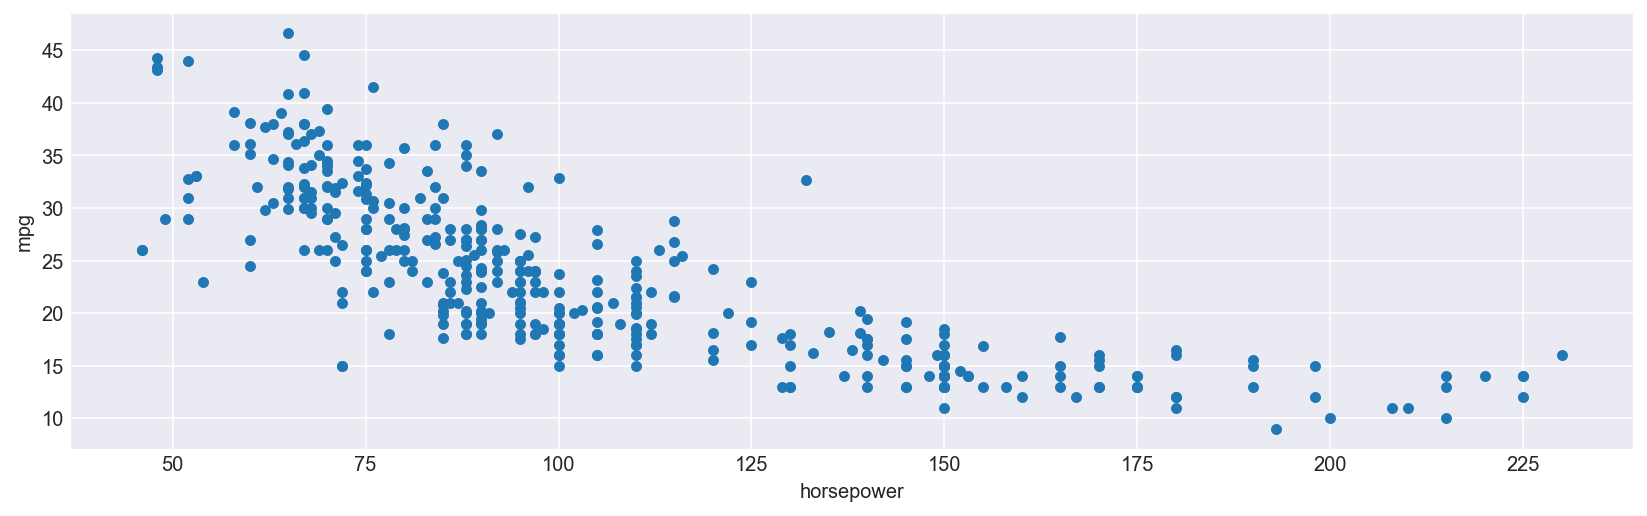

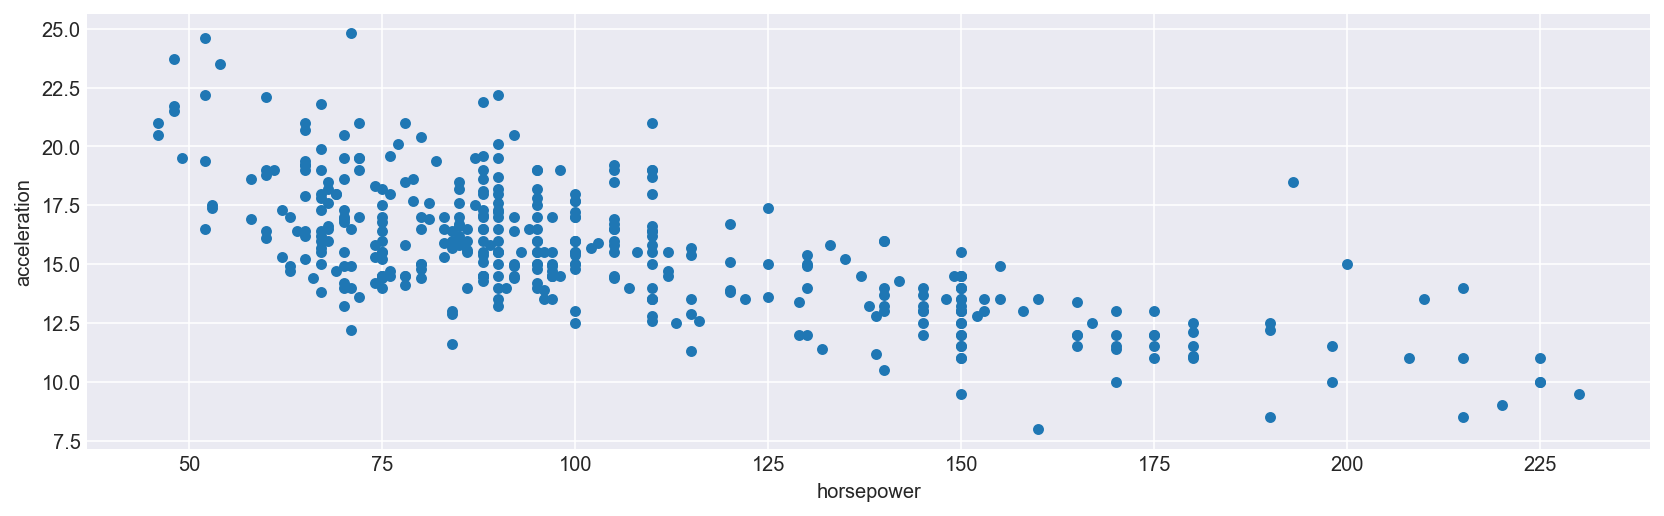

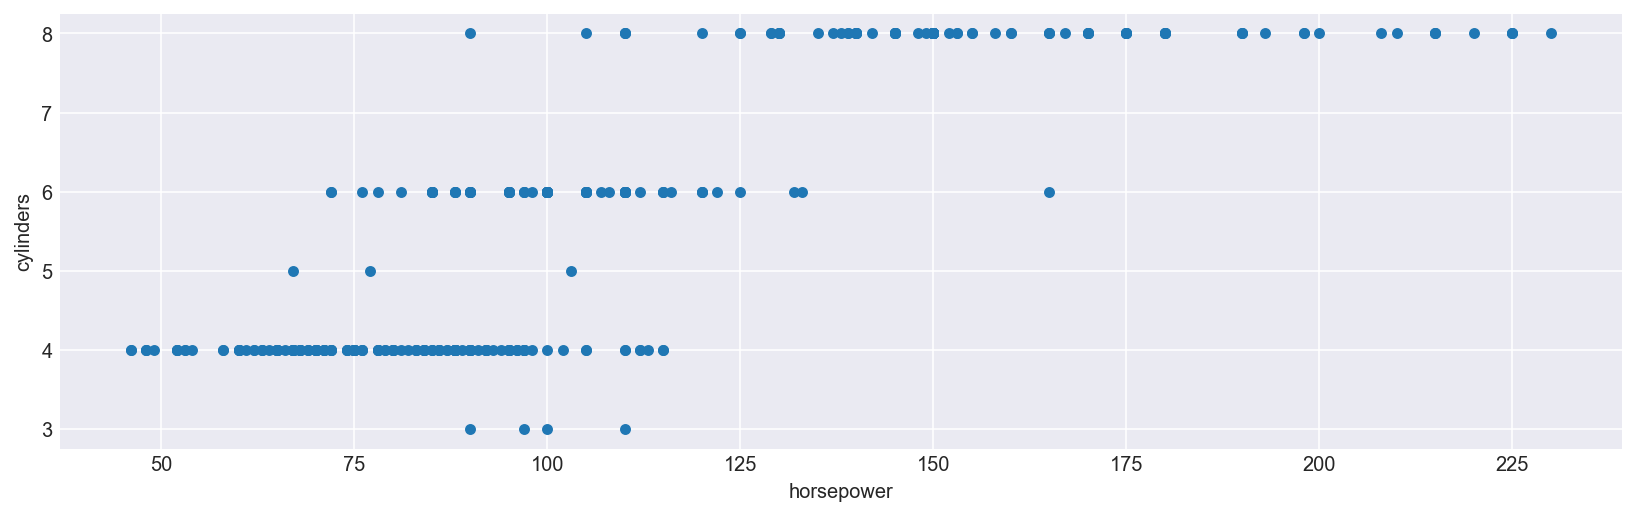

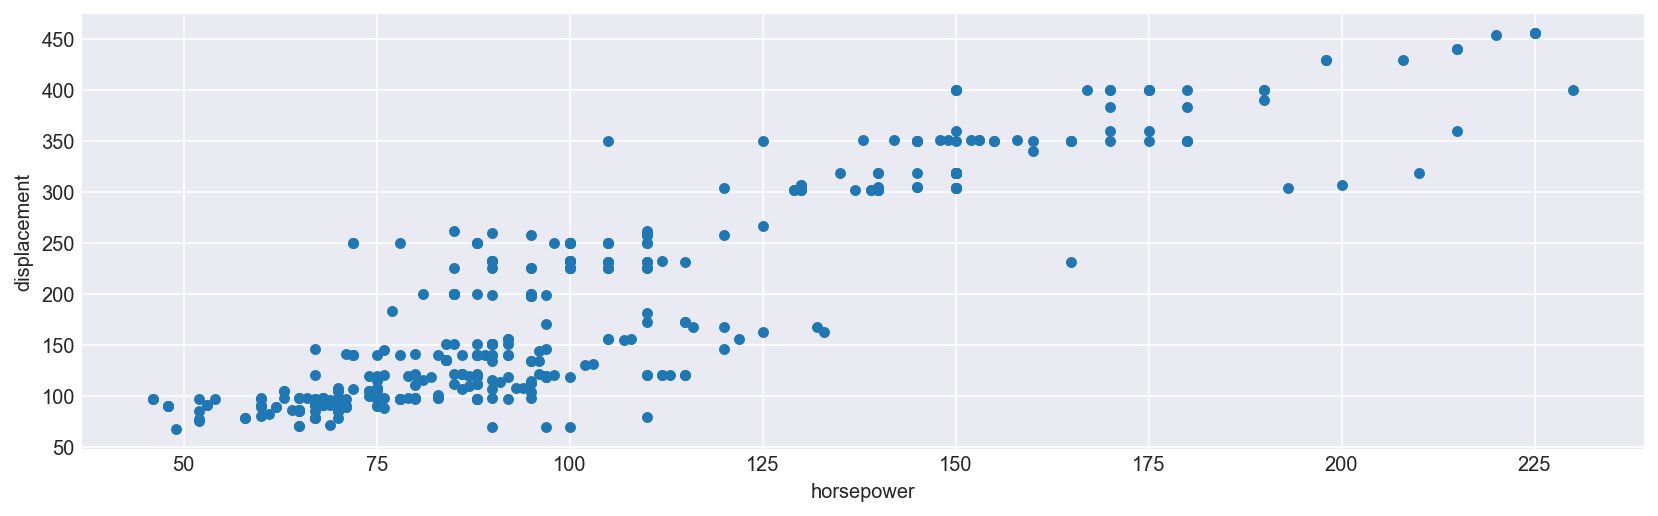

In [14]:
# df_auto.plot(x='horsepower',y='mpg',kind='scatter') #error
df_auto['horsepower'] = df_auto['horsepower'].replace('?',np.nan)
df_auto['horsepower'] = df_auto['horsepower'].fillna(method='ffill')
df_auto.plot(x='horsepower',y='mpg',kind='scatter')
df_auto.plot(x='horsepower',y='acceleration',kind='scatter')
df_auto.plot(x='horsepower',y='cylinders',kind='scatter')
df_auto.plot(x='horsepower',y='displacement',kind='scatter')

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

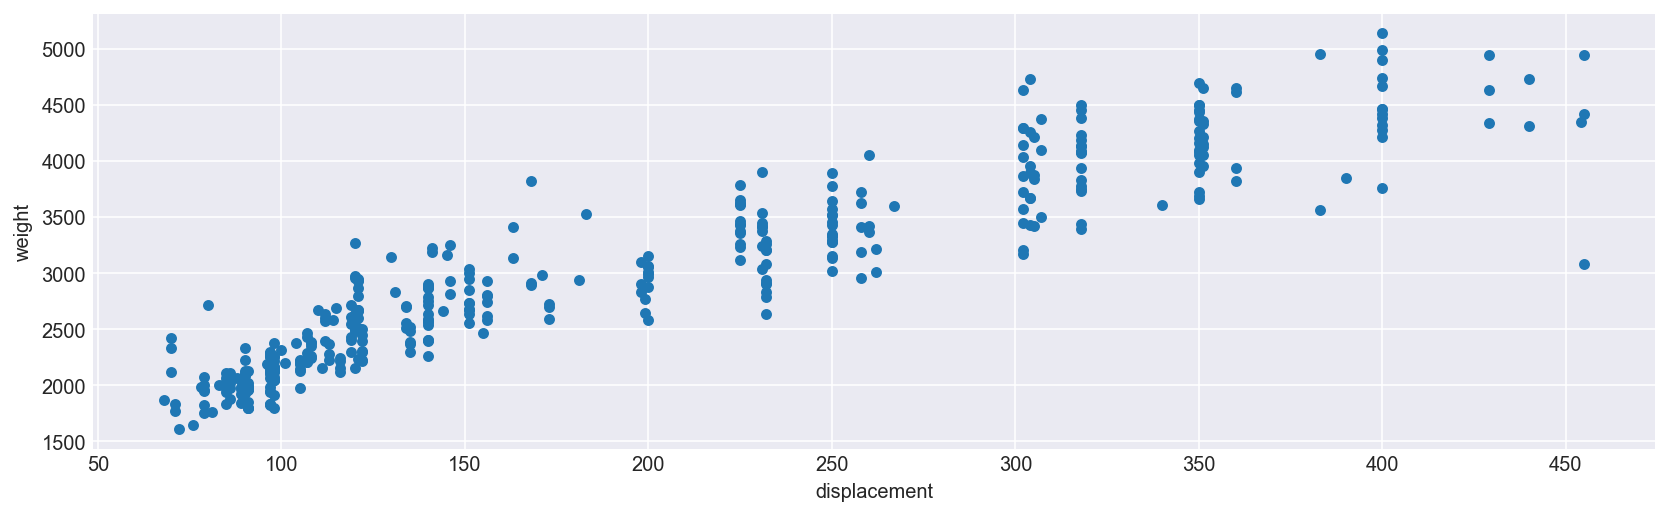

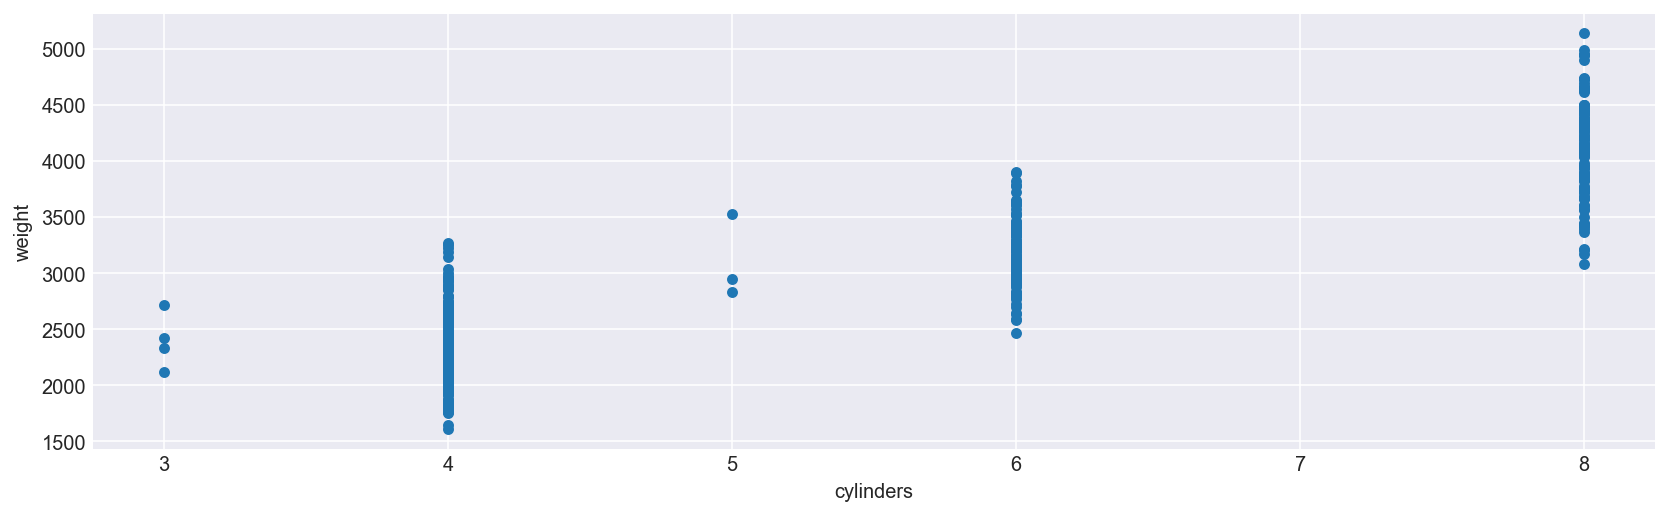

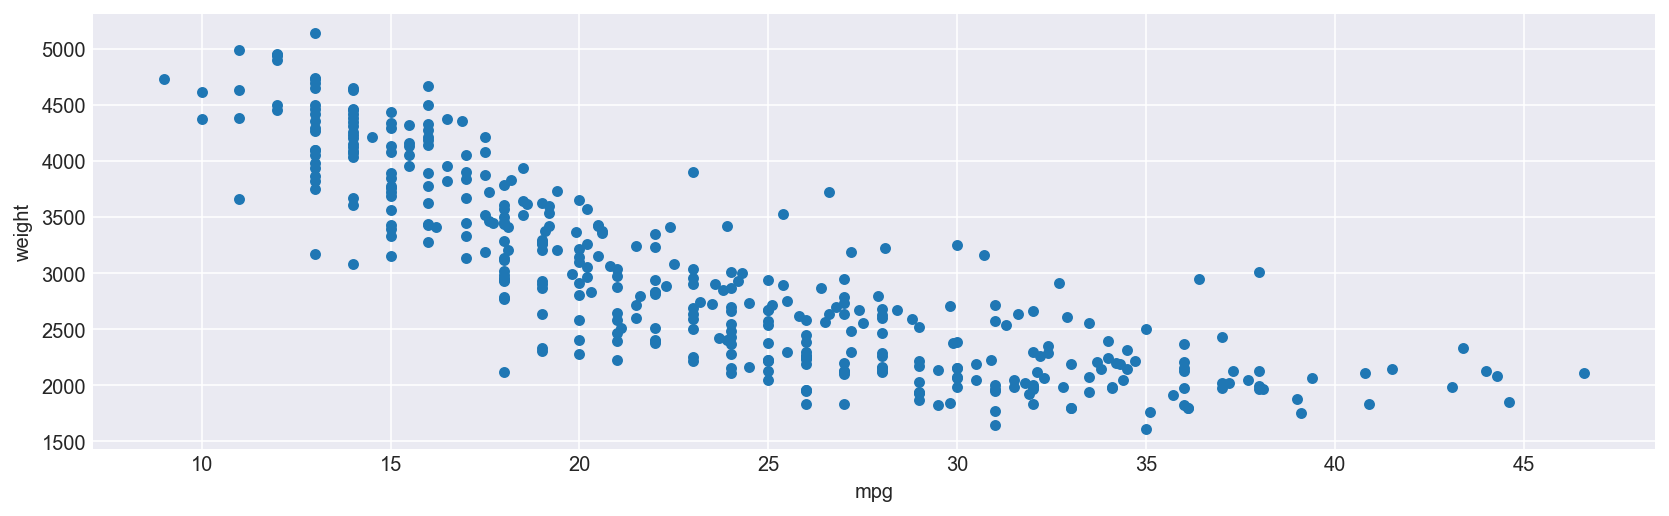

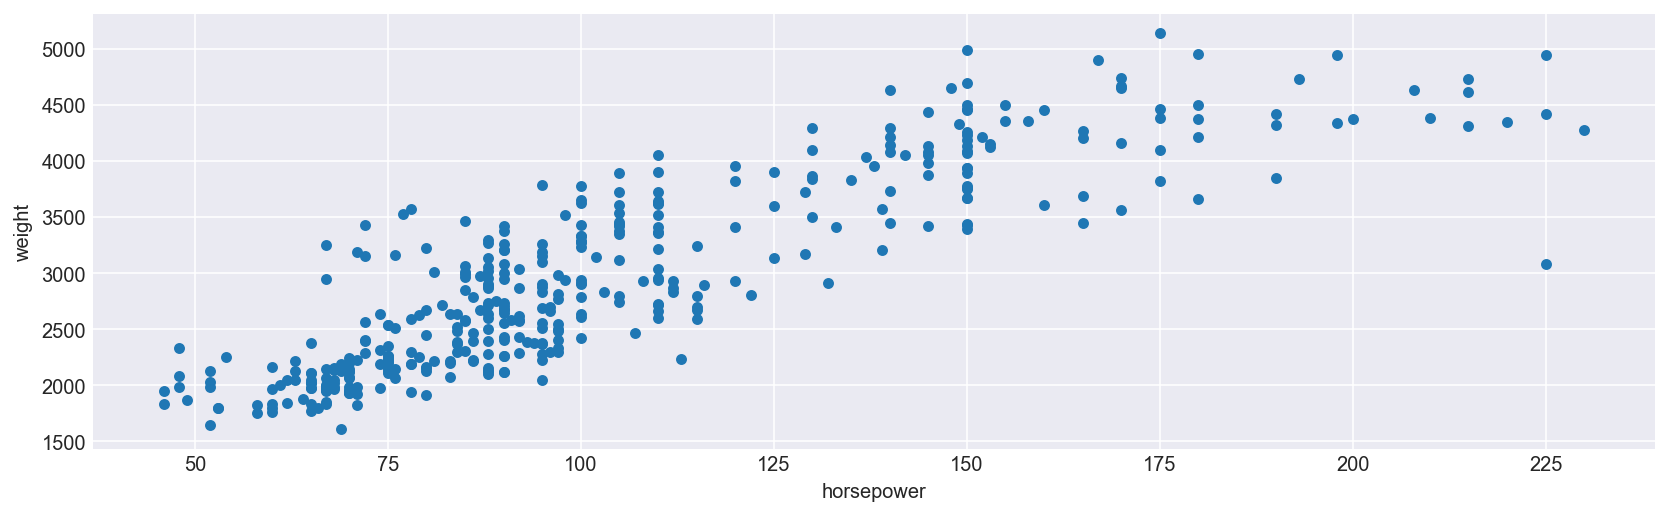

In [15]:
df_auto.plot(x='displacement',y='weight',kind='scatter')
df_auto.plot(x='cylinders',y='weight',kind='scatter')
df_auto.plot(x='mpg',y='weight',kind='scatter')
df_auto.plot(x='horsepower',y='weight',kind='scatter')

In [16]:
df_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

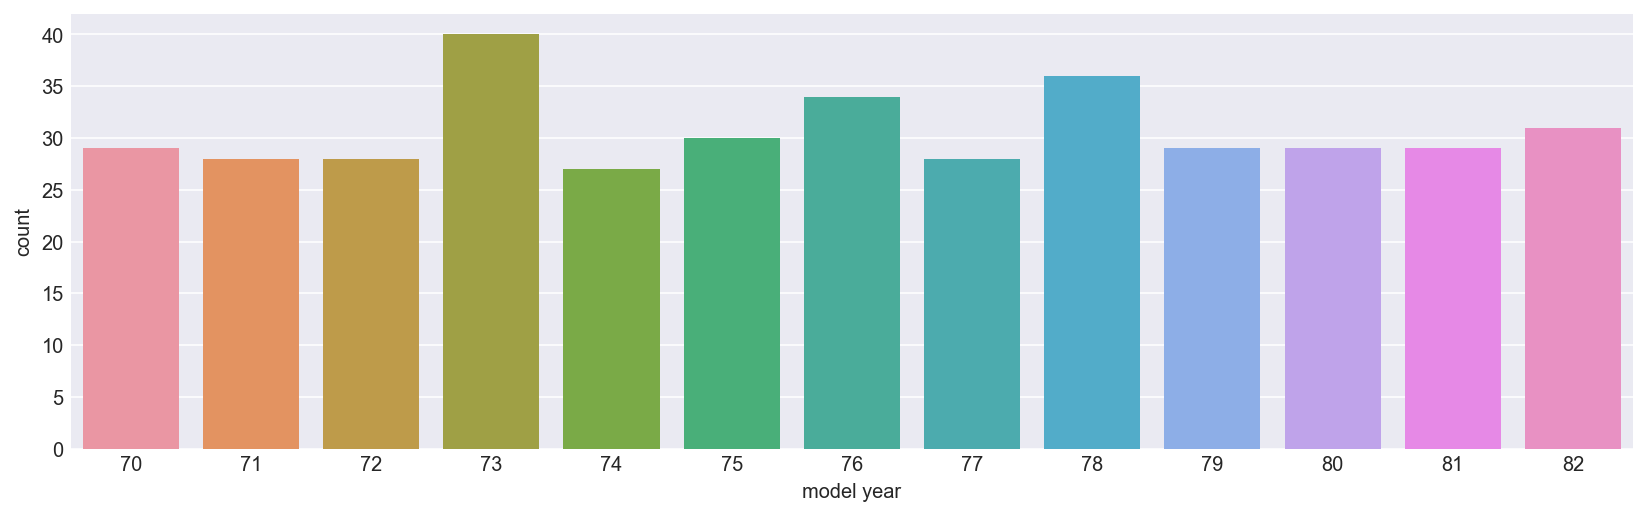

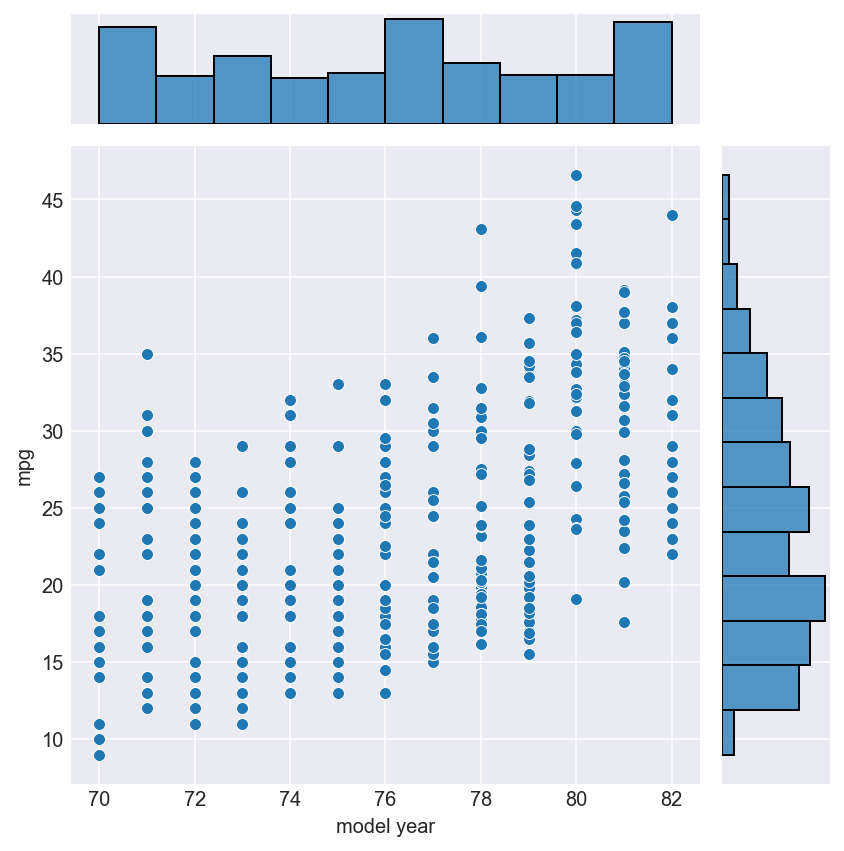

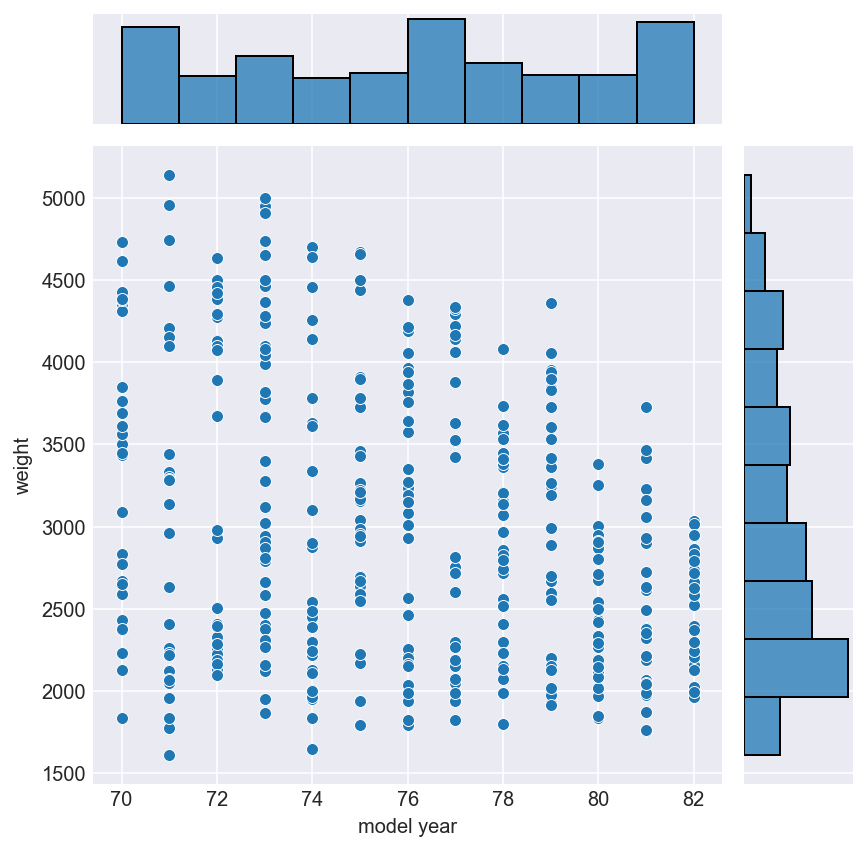

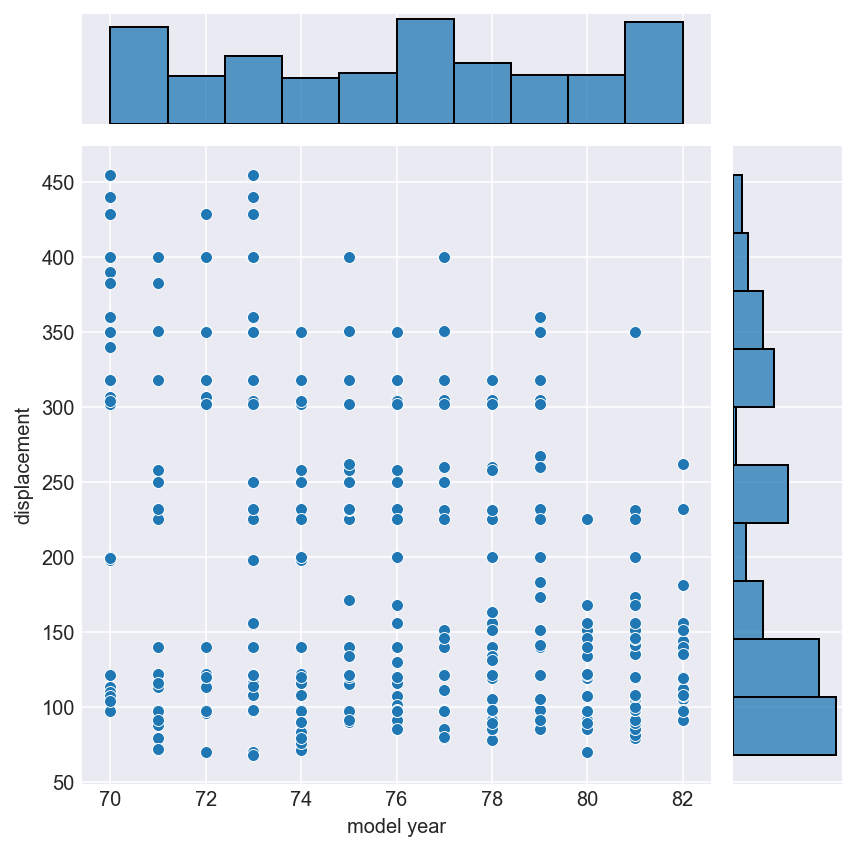

In [17]:
sns.countplot(x='model year',data=df_auto)
sns.jointplot(x='model year',y='mpg',data=df_auto)
sns.jointplot(x='model year',y='weight',data=df_auto)
sns.jointplot(x='model year',y='displacement',data=df_auto)


C:\Users\kikir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='displacement'>

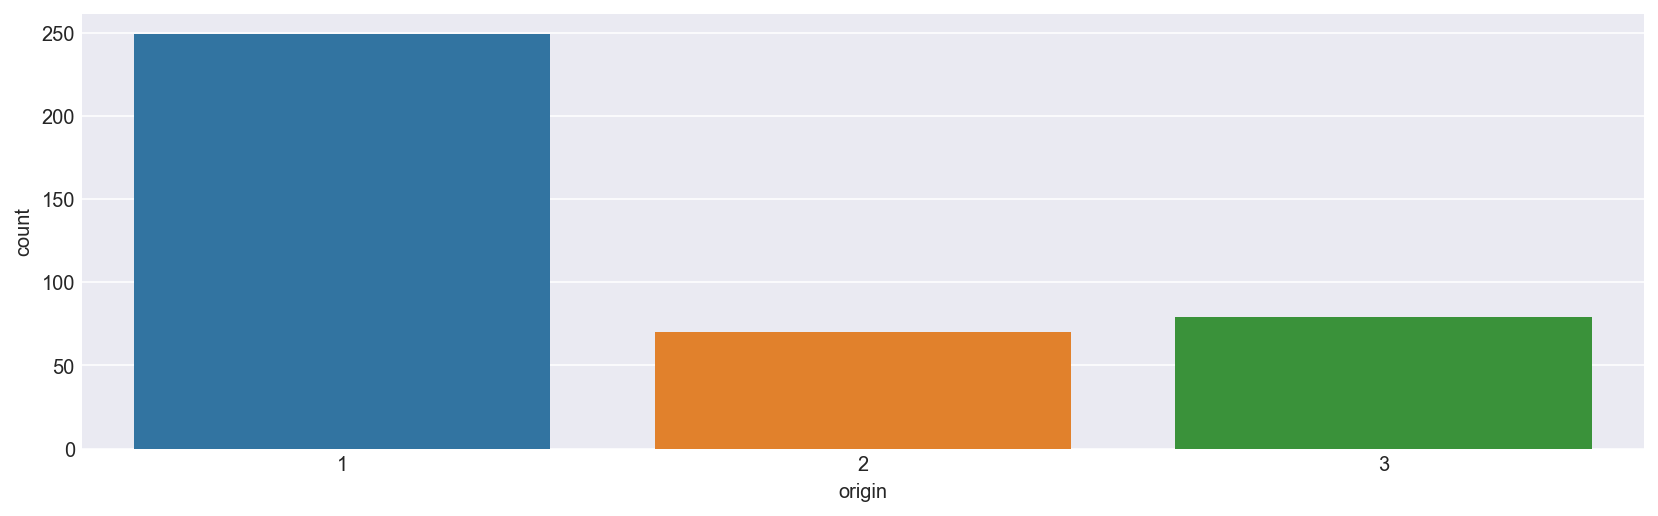

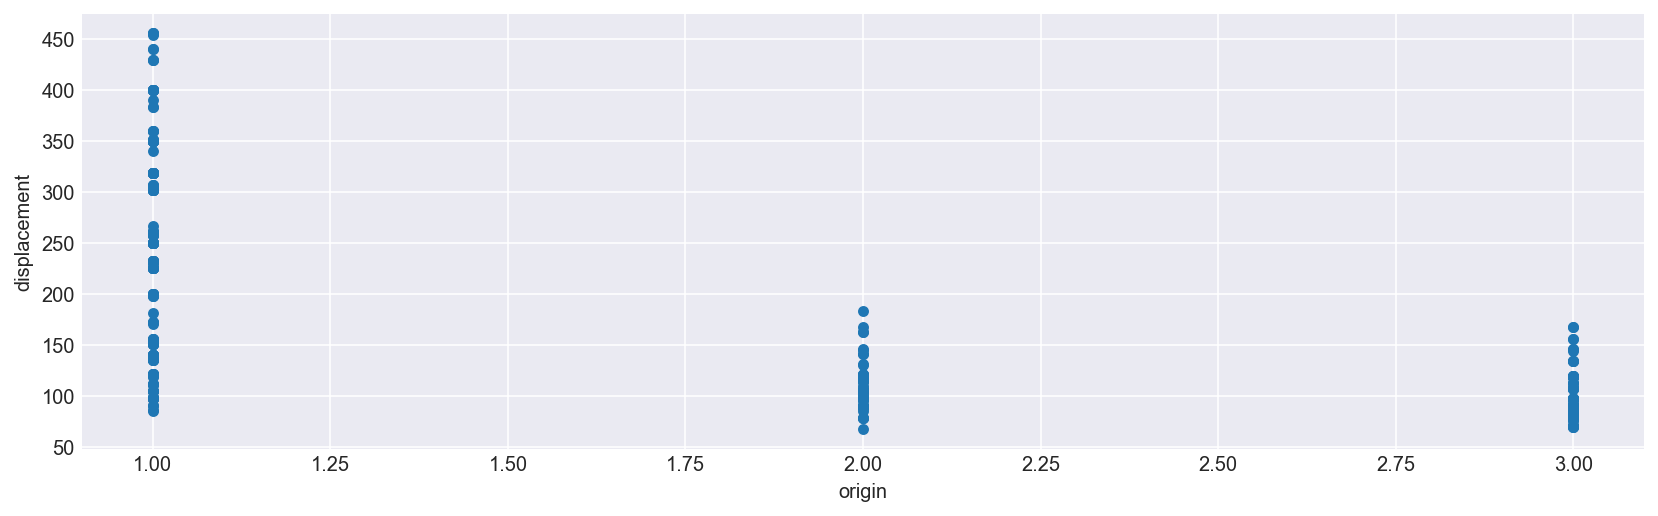

In [18]:
sns.countplot(df_auto['origin'])
df_auto.plot(x='origin',y='displacement',kind='scatter')

##### 과제
mpg컬럼의 이상치를 구하세요

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

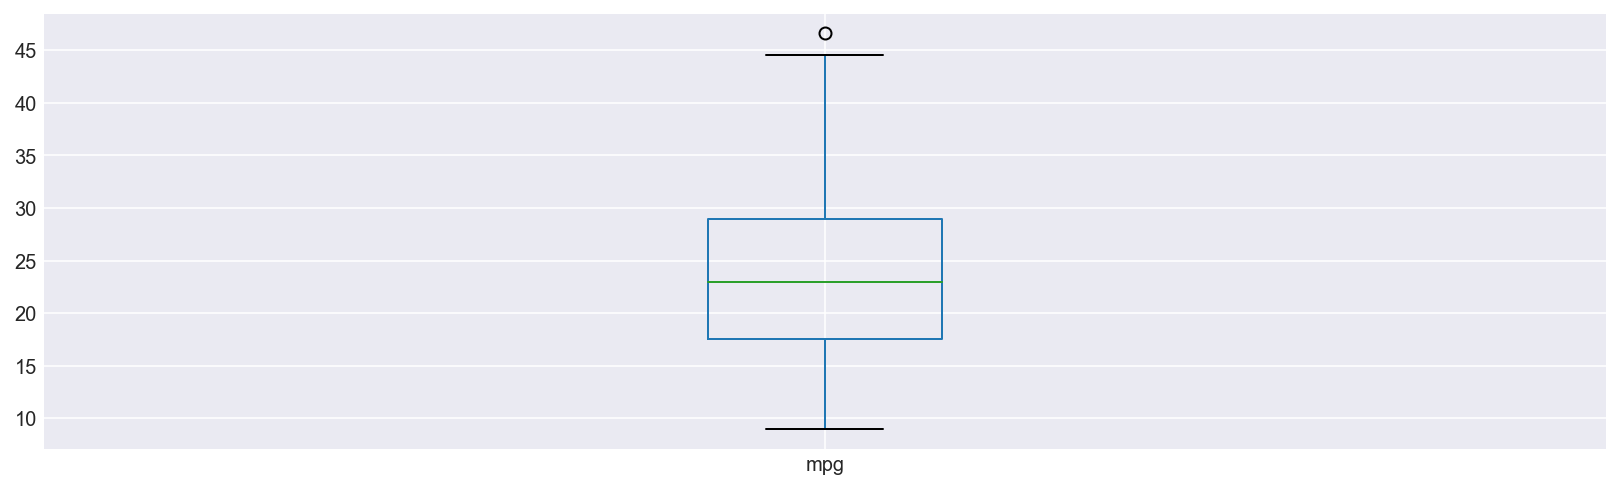

In [19]:
df_auto['mpg'].plot(kind='box') #이상치 하나 존재. -이상치 파악
df_auto['mpg'].describe()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [63]:
Q1 = df_auto['mpg'].describe()['25%']
Q3 = df_auto['mpg'].describe()['75%']
IQR = Q3 - Q1 
outlier = float(df_auto[(df_auto['mpg'] <= (Q1-IQR*1.5)) | ((df_auto['mpg'] >= (Q3+IQR*1.5)))]['mpg'])
outlier

lower_whisker = df_auto[df_auto['mpg'] > (Q1-IQR*1.5)]['mpg'].min()
upper_whisker = df_auto[df_auto['mpg'] < (Q3+IQR*1.5)]['mpg'].max()

print('outlier >',outlier)
print('upper_whisker > ',upper_whisker)
print('IQR > ',IQR)
print('lower_whisker > ',lower_whisker)


outlier > 46.6
upper_whisker >  44.6
IQR >  11.5
lower_whisker >  9.0


##### 과제
통계학의 기초 개념을 설명하세요

    모수의 개념 및 사례

    통게량의 개념 및 사례

    확률변수, 확률, 확률분포

    도수, 도수분포, 상대도수

    평균값, 기대값, 분산, 표준편차

    확률질량함수, 확률밀도함수

    정규분포, 이항분포, 포아송분포

# 민아님 등판

기술통계 : 수집한 표본의 통계량을 기술, 설명하는 통계기법.
추측통계 : 표본에서 추출한 표본 통계량을 기반으로 모집단의 모수를 예측하는 통계기법.